In [1]:
#Definição das funções


import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o valor intrínseco usando a fórmula de Graham
def calcular_valor_intrinseco(LPA, VPA):
    return np.sqrt(22.5 * LPA * VPA)

# Função para calcular a margem de segurança
def calcular_margem_de_seguranca(valor_intrinseco,preco_mercado):
    return (valor_intrinseco - preco_mercado) / valor_intrinseco

# Função para ajustar o retorno esperado baseado no valor intrínseco
def ajustar_mu(preco_mercado, valor_intrinseco, mu_base):
    margem_de_seguranca = calcular_margem_de_seguranca(valor_intrinseco,preco_mercado)
    return mu_base * (1 + margem_de_seguranca )

# Função para ajustar a volatilidade baseada na margem de segurança
def ajustar_sigma(preco_mercado, valor_intrinseco, sigma_base):
    margem_de_seguranca = calcular_margem_de_seguranca(valor_intrinseco,preco_mercado)
    return sigma_base * (1 - margem_de_seguranca)

In [2]:
# Parâmetros do mercado

#graham
LPA = 5  # Lucro por Ação
VPA = 20  # Valor Patrimonial por Ação
limiar_min = 0.6 #limite inferior
limiar_max = 1.1 #limite superior
ponto_intermediario = 1.2 # meio termo

valor_intrinseco = calcular_valor_intrinseco(LPA, VPA)

#wiener
preco_mercado = 50  # Preço de mercado atual
mu_base = 0.05  # Retorno base (média histórica)
sigma_base = 0.5  # Volatilidade base

# Ajustar retorno esperado para visualizar graham
mu = ajustar_mu(preco_mercado, valor_intrinseco, mu_base)

#ão faz sentido alterar a volatilidade baseado em grahma
#sigma = ajustar_sigma(preco_mercado, valor_intrinseco, sigma_base)
sigma = sigma_base

#mercado
numero_de_ativos = 5
mercado = []

# Simulação do Movimento Browniano Geométrico (GBM)
T = 5  # Período de tempo (5 anos)
N = 5*12  # Número de passos (mês) 
dt = T / N  # Intervalo de tempo


In [3]:
#Criação do mercado

#mudar os valores do seed dps

for seed in range (1,numero_de_ativos+1):# deixar um valor fixo para poder ter reprodutibilidade
    np.random.seed(seed)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt) 

    # Preço simulado com ajuste de parâmetros
    time = np.linspace(0, T, N)
    ativo = preco_mercado * np.exp((mu - 0.5 * sigma**2) * time + sigma * W) # para o caso de achar que esquecemos o sqrt(t), olha o W mais em cima
    mercado.append(ativo)

In [4]:
#Criacao dos investidores

recurso_inicial = 1000

#Quantidade de amostras(investidores)
numero_de_investidores = 100


array_min = np.linspace(limiar_min, ponto_intermediario, numero_de_investidores)  # De limiar_min até o ponto intermediário
#array_max = np.linspace(ponto_intermediario, limiar_max, numero_de_investidores)  # Do ponto intermediário até limiar_max
array_max =np.full(numero_de_investidores, ponto_intermediario)
investidores = np.array([[array_min[i], array_max[i]] for i in range(numero_de_investidores)])


#Definicao dos resultados
carteira_investidor_i = np.zeros((numero_de_investidores, numero_de_ativos))
resultado_investidor_i = np.full(numero_de_investidores, recurso_inicial)




In [5]:
#Colocar a estrategia
n_acao_alterada_por_iteracao = 1
max_ativos_diferentes = 5


numero_passos = N
for passo in range(0,numero_passos):
#     if passo % 6 == 0 and passo != 0:
#         rebalancear()
#     if passo % 12 == 0 and passo != 0:
#         reajuste_graham()
    n_ativo = 0 # para saber qual ativo
    for ativo in mercado:
        preco = ativo[passo]
        gasto = preco*n_acao_alterada_por_iteracao
        for i in range(numero_de_investidores):
            limiar_min_i = investidores[i][0]
            limiar_max_i = investidores[i][1]
            numero_ativos_diferentes = np.count_nonzero(carteira_investidor_i[i])
            if preco > valor_intrinseco*limiar_max_i and carteira_investidor_i[i][n_ativo] >=1:
                resultado_investidor_i[i] += gasto
                carteira_investidor_i[i][n_ativo] -= 1
            if numero_ativos_diferentes > max_ativos_diferentes and carteira_investidor_i[i][n_ativo] == 0:
                continue
            if preco < valor_intrinseco*limiar_min_i and resultado_investidor_i[i]>preco :
                resultado_investidor_i[i] -= gasto
                carteira_investidor_i[i][n_ativo] +=1
            if passo == numero_passos-1:
                resultado_investidor_i[i] += carteira_investidor_i[i][n_ativo] * preco
        n_ativo+=1
            
        
    




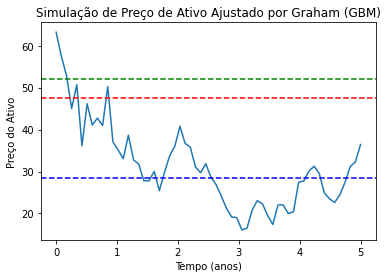

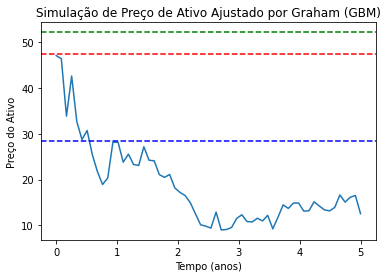

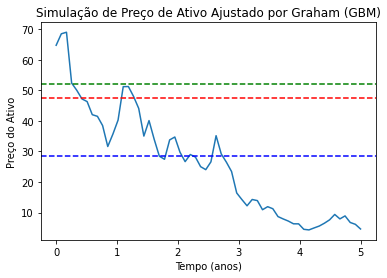

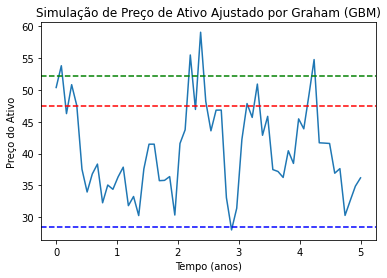

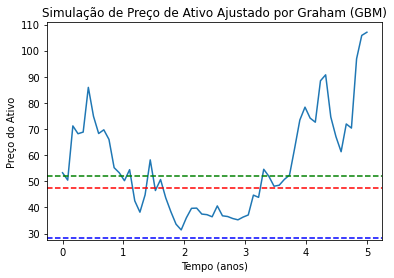

In [6]:
#Visualização das ações
for S in mercado:
    plt.plot(time, S)
    plt.axhline(y=valor_intrinseco*limiar_min, color='b', linestyle='--', label=f'Valor Intrínseco min = {valor_intrinseco*limiar_min}')
    plt.axhline(y=valor_intrinseco, color='r', linestyle='--', label=f'Valor Intrínseco = {valor_intrinseco}')
    plt.axhline(y=valor_intrinseco*limiar_max, color='g', linestyle='--', label=f'Valor Intrínseco max = {valor_intrinseco*limiar_max}')
    plt.title('Simulação de Preço de Ativo Ajustado por Graham (GBM)')
    plt.xlabel('Tempo (anos)')
    plt.ylabel('Preço do Ativo')
    plt.show()

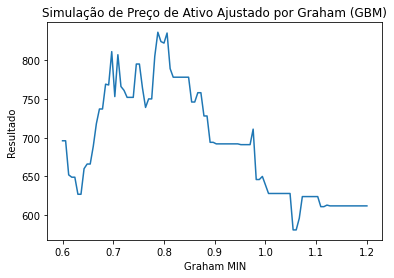

Desvio Padrão: 69.66164726734505


In [7]:
#Visualiazação de resultados
plt.plot(array_min,resultado_investidor_i )
plt.title('Simulação de Preço de Ativo Ajustado por Graham (GBM)')
plt.xlabel('Graham MIN')
plt.ylabel('Resultado')
plt.show()

desvio_padrao =  np.std(resultado_investidor_i)
print("Desvio Padrão:",desvio_padrao )